In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
file1="c:/temp/Auto.csv"
Auto=pd.read_csv(file1)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
Auto.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
387,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
388,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
389,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
390,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
391,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [4]:
Auto.shape

(397, 9)

In [5]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [6]:
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
Auto['mpg'].describe()

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [8]:
Auto[['mpg','cylinders']].describe()

,mpg,cylinders
count,397.000000,397.000000
mean,23.515869,5.458438
std,7.825804,1.701577
min,9.000000,3.000000
25%,17.500000,4.000000
50%,23.000000,4.000000
75%,29.000000,8.000000
max,46.600000,8.000000


In [10]:
Auto['origin']=Auto['origin'].astype('category')
Auto['origin'].value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

In [11]:
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [12]:
Auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.0,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,3.0,304
top,NaN,NaN,NaN,150,NaN,NaN,NaN,1.0,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,248.0,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,NaN,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,NaN,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,NaN,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,NaN,NaN


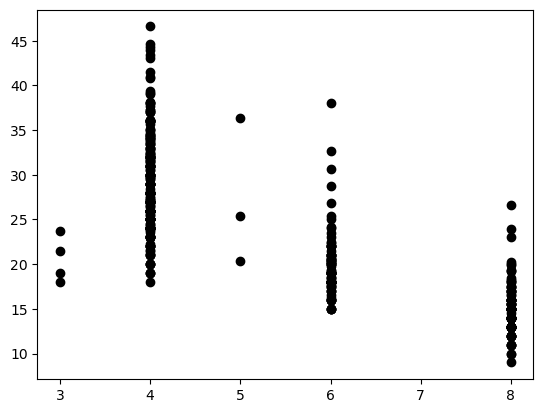

In [18]:
plt.plot('cylinders','mpg',data=Auto,linestyle='',marker='o',color='black')
plt.show()

In [19]:
#Auto랑 Auto.describe(include='all') 차이는 뭐지

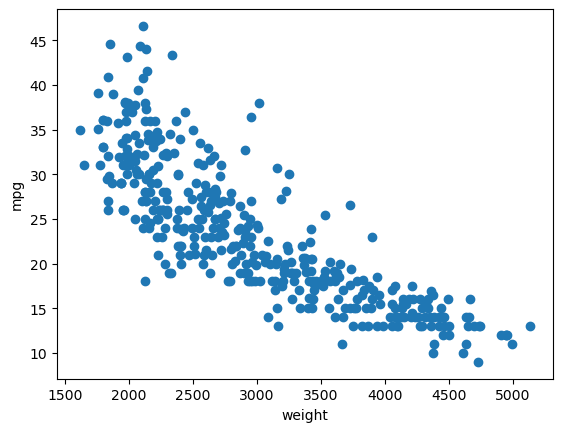

In [23]:
plt.plot('weight','mpg',data=Auto,linestyle='',marker='o')
#x,y
plt.ylabel('mpg')
plt.xlabel('weight')
plt.show()

In [24]:
file2="c:/temp/flight_delays.csv"
flight_delays=pd.read_csv(file2,index_col='Month')
flight_delays

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


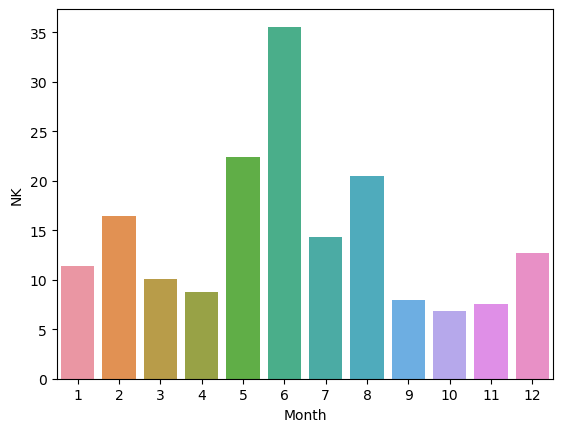

In [26]:
sns.barplot(x=flight_delays.index,y=flight_delays['NK'])
plt.show()

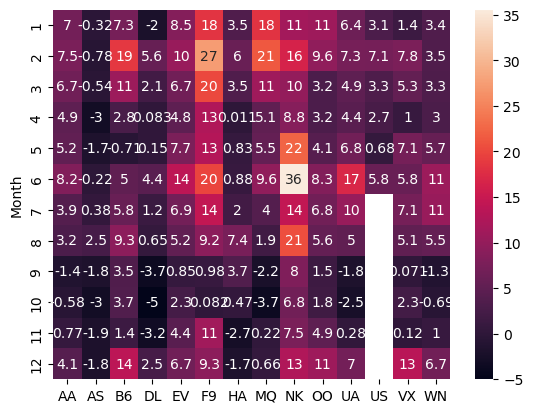

In [27]:
sns.heatmap(data=flight_delays,annot=True)
plt.show()

# Lecture 3: Linear Regression

In [28]:
file3="c:/temp/B_data2_1.csv"
data2=pd.read_csv(file3)
data2

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat
0,24.000000,0.006,5.38,6.57,4.09,0,29.600000,15.300000,4.98
1,21.599001,0.027,4.69,6.42,4.97,0,24.200001,17.799999,9.14
2,34.700001,0.027,4.69,7.18,4.97,0,24.200001,17.799999,4.03
3,33.400002,0.032,4.58,7.00,6.06,0,22.200001,18.700001,2.94
4,36.199001,0.069,4.58,7.15,6.06,0,22.200001,18.700001,5.33
...,...,...,...,...,...,...,...,...,...
501,22.400000,0.063,5.73,6.59,2.48,0,27.299999,21.000000,9.67
502,20.600000,0.045,5.73,6.12,2.29,0,27.299999,21.000000,9.08
503,23.899000,0.061,5.73,6.98,2.17,0,27.299999,21.000000,5.64
504,22.000000,0.110,5.73,6.79,2.39,0,27.299999,21.000000,6.48


In [29]:
y=data2['price']
x=data2['crime']
X=sm.add_constant(x)

result1=sm.OLS(y,X).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.28
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.28e-19
Time:                        18:24:52   Log-Likelihood:                -1799.6
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0134      0.410     58.600      0.000      23.208      24.818
crime         -0.4159      0.044     -9.449      0.000      -0.502      -0.329
==============================================================================
Omnibus:                      139.591   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.258
Skew:                           1.489   Prob(JB):                     1.27e-64
Kurtosis:                       5.256   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
yhat=result1.predict(X)
yhat

MSE=(1/506)*sum((y-yhat)**2)
MSE

71.89938969475358

In [31]:
RMSE=np.sqrt(MSE)
RMSE

8.479350782622074

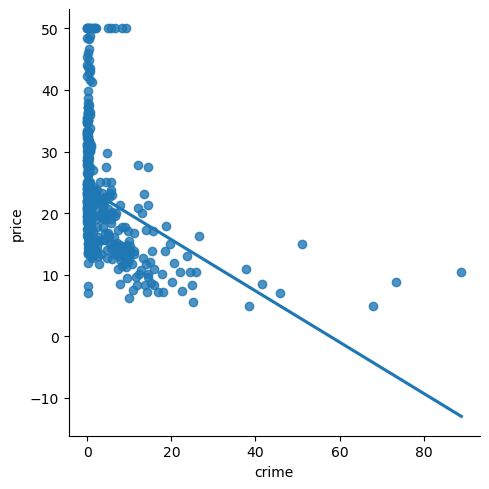

In [34]:
sns.lmplot('crime','price',data=data2,ci=None)
plt.show()

# Log-linear regression model

y에 로그를 취한 것. = y와 x의 관계가 비선형. exp관계

In [36]:
x=np.linspace(1,10,100)
y=np.exp(x)
#x, y 가 exp관계

y=data2['price']
x=data2['crime']
X=sm.add_constant(x)
y1=np.log(y) #얜 뭐지

result2=sm.OLS(y1,X).fit() 
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     194.3
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.38e-37
Time:                        18:35:09   Log-Likelihood:                -182.92
No. Observations:                 506   AIC:                             369.8
Df Residuals:                     504   BIC:                             378.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1241      0.017    186.110      0.000       3.091       3.157
crime         -0.0251      0.002    -13.939      0.000      -0.029      -0.022
==============================================================================
Omnibus:                       29.115   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.923
Skew:                           0.455   Prob(JB):                     7.88e-10
Kurtosis:                       4.076   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
yhat_log=result2.predict(X)
yhat_log
#여기 논리를 잘 모르겠다

0      3.123912
1      3.123384
2      3.123384
3      3.123258
4      3.122329
         ...   
501    3.122479
502    3.122932
503    3.122530
504    3.121298
505    3.122881
Length: 506, dtype: float64

In [39]:
sigma2_hat=sum((y1-yhat_log)**2)/(506-2)
sigma2_hat

0.121125303100613

In [40]:
yhat2=np.exp(yhat_log+sigma2_hat/2)
yhat2
#로그리니어일때 MSE위한 y예측값 의 논리 모르겠음

0      24.154591
1      24.141847
2      24.141847
3      24.138814
4      24.116379
         ...    
501    24.120016
502    24.130929
503    24.121228
504    24.091543
505    24.129716
Length: 506, dtype: float64

In [41]:
MSE2=(1/506)*sum((y-yhat2)**2)
MSE2

68.65166577937099

In [42]:
y3=data2['price']
x3=data2[['rooms','crime']]
X3=sm.add_constant(x3)

result3=sm.OLS(y3,X3).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     298.2
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           4.00e-86
Time:                        18:45:56   Log-Likelihood:                -1643.1
No. Observations:                 506   AIC:                             3292.
Df Residuals:                     503   BIC:                             3305.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.3769      2.590    -11.344      0.000     -34.465     -24.289
rooms          8.4097      0.405     20.758      0.000       7.614       9.206
crime         -0.2653      0.033     -8.008      0.000      -0.330      -0.200
==============================================================================
Omnibus:                      173.164   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1051.477
Skew:                           1.356   Prob(JB):                    4.73e-229
Kurtosis:                       9.521   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
yhat3=result3.predict(X3)
MSE3=(1/506)*sum((y3-yhat3)**2)
MSE3
#MSE가 더떨어졌다.

38.725458111634744

## out of sample prediction

In [46]:
y4=data2['price']
x4=data2['crime']
X4=sm.add_constant(x)

result4=sm.OLS(y4,X4).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.28
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.28e-19
Time:                        18:58:53   Log-Likelihood:                -1799.6
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0134      0.410     58.600      0.000      23.208      24.818
crime         -0.4159      0.044     -9.449      0.000      -0.502      -0.329
==============================================================================
Omnibus:                      139.591   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.258
Skew:                           1.489   Prob(JB):                     1.27e-64
Kurtosis:                       5.256   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,train_size=0.7,random_state=0)

result4=sm.OLS(y4_train,X4_train).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     62.86
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           2.97e-14
Time:                        19:00:44   Log-Likelihood:                -1259.3
No. Observations:                 354   AIC:                             2523.
Df Residuals:                     352   BIC:                             2530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1866      0.488     49.602      0.000      23.228      25.146
crime         -0.4308      0.054     -7.928      0.000      -0.538      -0.324
==============================================================================
Omnibus:                       95.612   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.628
Skew:                           1.445   Prob(JB):                     1.10e-41
Kurtosis:                       5.107   Cond. No.                         9.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
yhat4_test=result4.predict(X4_test)
yhat4_test

329    24.157788
371    20.209847
219    24.137542
403    13.502872
78     24.162527
         ...    
4      24.156927
428    21.013220
385    16.944666
308    23.974283
5      24.173726
Length: 152, dtype: float64

In [49]:
resid_test=y4_test-yhat4_test
MSE4_test=(1/152)*sum(resid_test**2)
MSE4_test

71.73033294147099

# Lecture 4: Logistic Regression

In [50]:
file5="c:/temp/credit_LN4.csv"
credit=pd.read_csv(file5)
credit

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [51]:
pd.value_counts(credit['default'])

No     9667
Yes     333
Name: default, dtype: int64

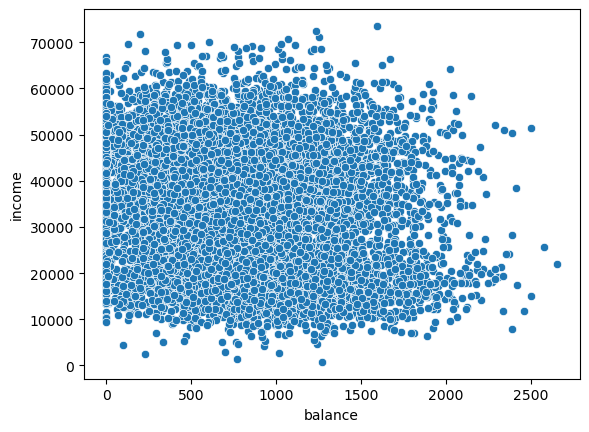

In [52]:
sns.scatterplot(x='balance',y='income',data=credit)
plt.show()

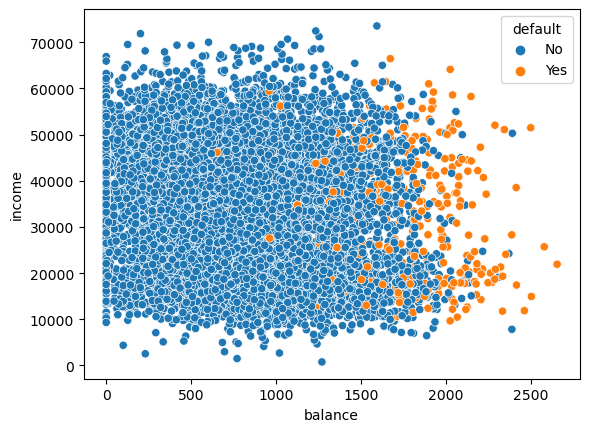

In [53]:
sns.scatterplot(x='balance',y='income',data=credit,hue='default')
plt.show()

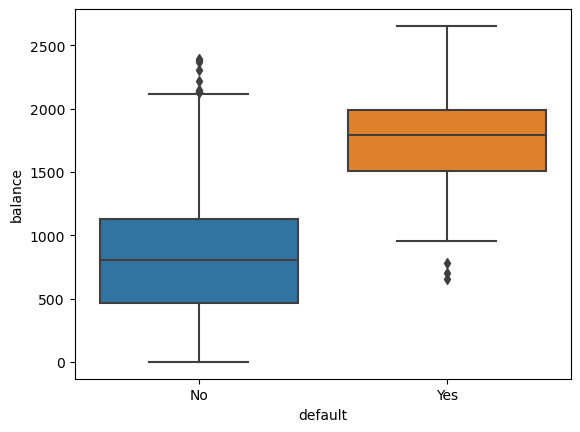

In [55]:
sns.boxplot(x='default',y='balance',data=credit)
plt.show()

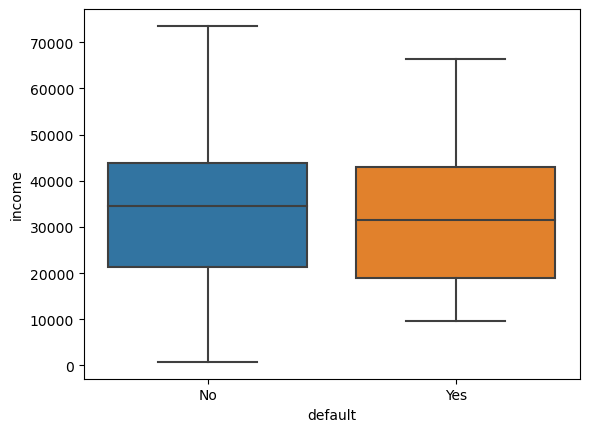

In [57]:
sns.boxplot(x='default',y='income',data=credit)
plt.show()

# Logistic Regression

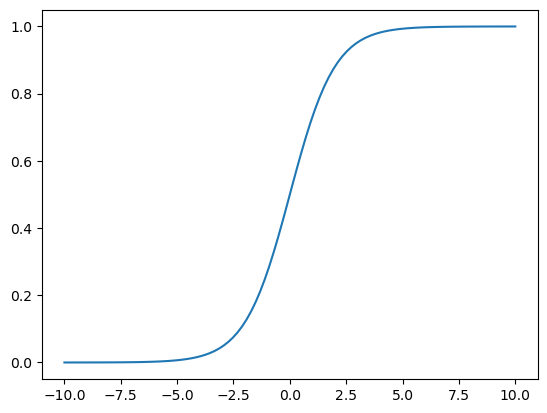

In [58]:
x=np.linspace(-10,10,100)
y=np.exp(x)/(1+np.exp(x))
plt.plot(x,y)
plt.show()
#logistic 분포의 CDF 함수: 항상 0에서 1 사이의 값 가짐

## Linear Probability Model

In [61]:
x=credit['balance']
X=sm.add_constant(x)
y=credit['default']

y=pd.get_dummies(y)
y=y['Yes']

LPM_result=sm.OLS(y,X).fit()
LPM_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Yes   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          2.77e-286
Time:                        19:11:10   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0752      0.003    -22.416      0.000      -0.082      -0.069
balance        0.0001   3.47e-06     37.374      0.000       0.000       0.000
==============================================================================
Omnibus:                     8547.967   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180810.806
Skew:                           4.243   Prob(JB):                         0.00
Kurtosis:                      22.025   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Logistic Regression

In [62]:
LGT_result=sm.Logit(y,X).fit()
LGT_result.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                     inf
Time:                        19:11:52   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""